In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder  
%pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

bank_df_clients = pd.read_csv('../data/raw/BankChurners.csv',encoding='latin-1', sep=',')
bank_df_clients.info()
bank_df_clients.head()


Note: you may need to restart the kernel to use updated packages.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender         

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


Vamos a trabajar con el siguiente Data Frame extraido de kaggle sobre datos Bancarios con informacion sobre los clientes para analizar la probabilidad de abandono del cliente:

In [2]:
#Como quiero predecir si un cliente va a abandonar el banco o no, elimino la columnas innecesarias para la predicción

bank_df_clients = bank_df_clients.drop(columns=["CLIENTNUM", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"])
bank_df_clients= bank_df_clients.rename(columns={'Attrition_Flag': 'permanencia','Customer_Age': 'edad', 'Gender': 'genero', 'Dependent_count': 'num_personas_dependientes', 'Education_Level': 'nivel_educativo', 'Marital_Status': 'estado_civil', 'Income_Category': 'banda_salarial', 'Card_Category': 'categoria_tarjeta','Months_on_book': 'num_meses_cliente','Total_Relationship_Count': 'productos_financieros_contratados','Months_Inactive_12_mon': 'num_meses_inactivo_12_meses','Contacts_Count_12_mon': 'veces_contactado_12_meses','Credit_Limit': 'limite_credito','Total_Revolving_Bal': 'saldo_pendiente_tarjeta', 'Avg_Open_To_Buy': 'credito_disponible', 'Total_Amt_Chng_Q4_Q1': 'dif_cantidad_gastada_trimestre', 'Total_Trans_Amt': 'credito_gastado_anual', 'Total_Trans_Ct': 'total_transacciones', 'Total_Ct_Chng_Q4_Q1': 'dif_total_trans_trimestre', 'Avg_Utilization_Ratio': 'ratio_utilizacion_credito'})
print('Hay valores nulos:', bank_df_clients.isnull().values.any())
bank_df_clients.describe()

Hay valores nulos: False


,edad,num_personas_dependientes,num_meses_cliente,productos_financieros_contratados,num_meses_inactivo_12_meses,veces_contactado_12_meses,limite_credito,saldo_pendiente_tarjeta,credito_disponible,dif_cantidad_gastada_trimestre,credito_gastado_anual,total_transacciones,dif_total_trans_trimestre,ratio_utilizacion_credito
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


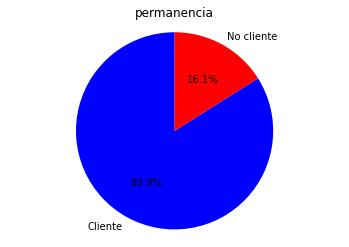

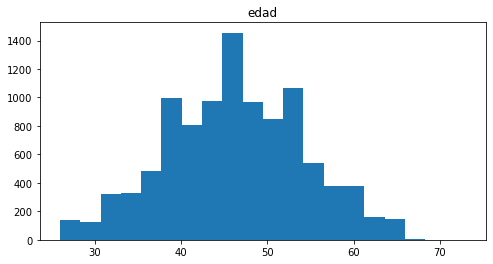

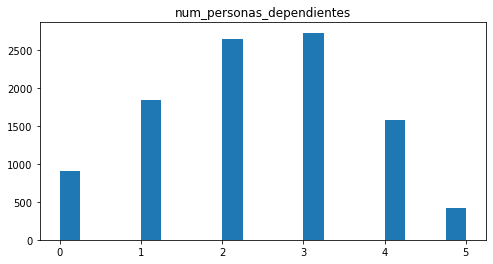

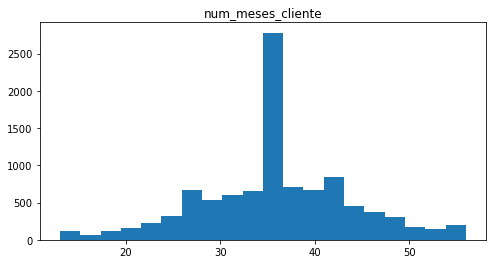

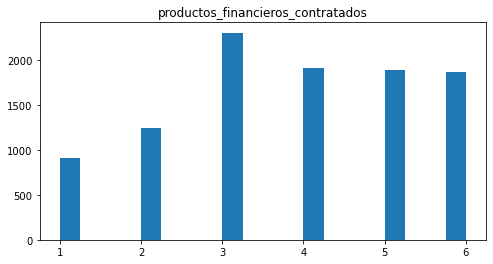

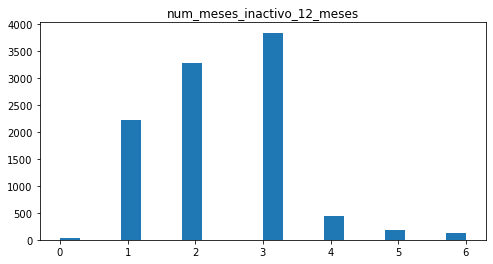

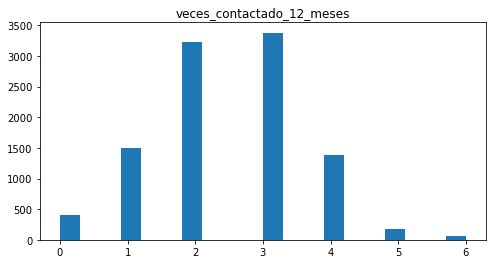

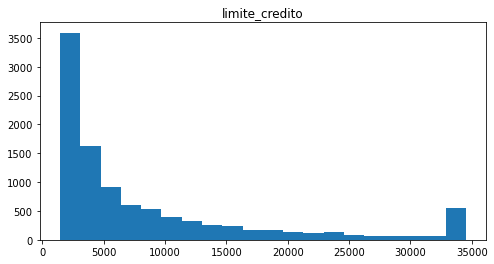

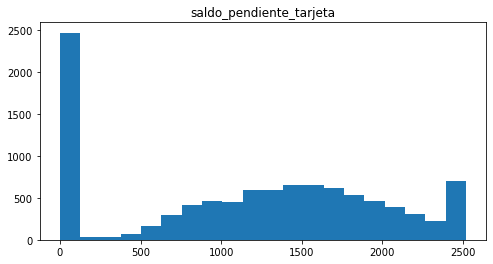

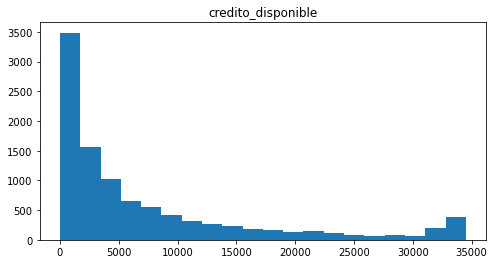

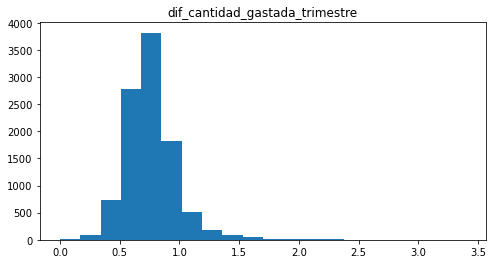

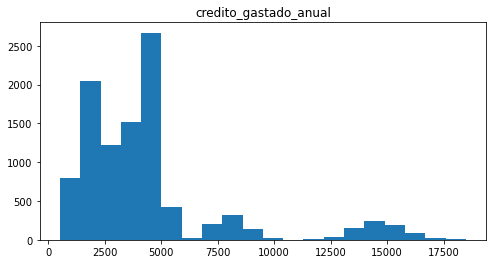

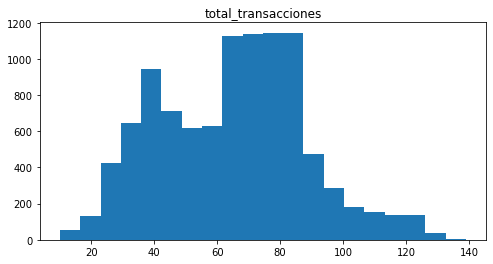

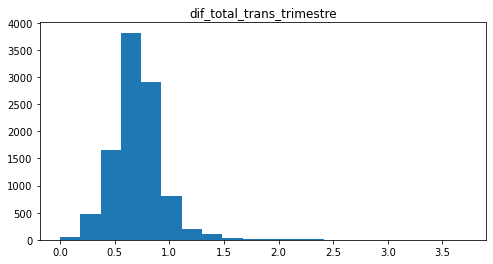

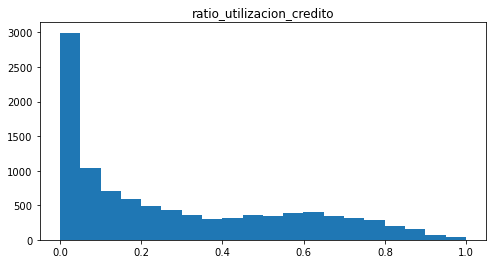

c:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


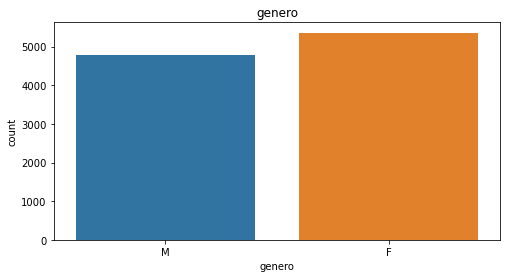

c:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


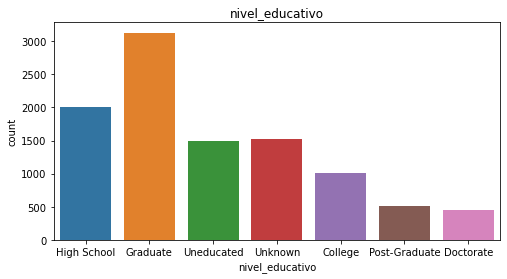

c:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


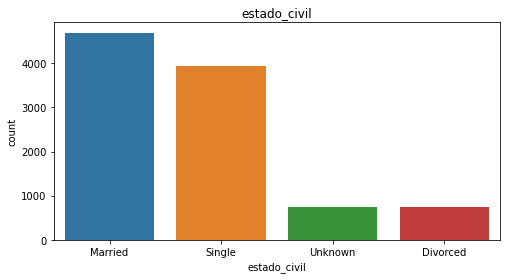

c:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


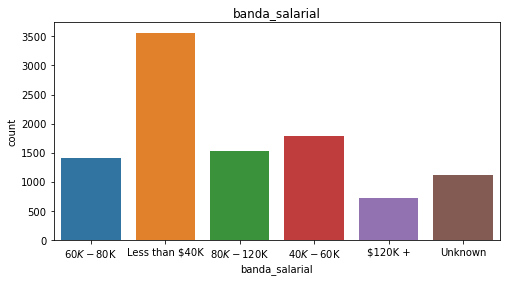

c:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


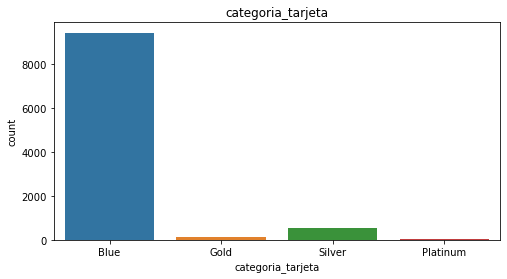

In [3]:

# Analisis Univariante

columnas = [ 'edad', 'num_personas_dependientes', 'num_meses_cliente', 'productos_financieros_contratados', 'num_meses_inactivo_12_meses', 'veces_contactado_12_meses', 'limite_credito', 'saldo_pendiente_tarjeta', 'credito_disponible', 'dif_cantidad_gastada_trimestre', 'credito_gastado_anual', 'total_transacciones', 'dif_total_trans_trimestre', 'ratio_utilizacion_credito']
colors = ['blue', 'red'] # Colores para cada categoría

for col in ['permanencia']:
    plt.pie(bank_df_clients[col].value_counts(), labels=['Cliente','No cliente'], colors=colors, autopct='%1.1f%%', startangle=90) # Crear gráfico circular
    plt.axis('equal') # Ajustar el gráfico a un círculo
    plt.title(col) # Título del gráfico
    plt.show() # Mostrar gráfico

for col in columnas:
    plt.figure(figsize=(8, 4))
    plt.hist(bank_df_clients[col], bins=20)
    plt.title(col)
    plt.show()

# gráficos de barra de variables categóricas
variables_categoricas = ["genero", "nivel_educativo", "estado_civil", "banda_salarial", "categoria_tarjeta"]

for col in variables_categoricas:
    plt.figure(figsize=(8, 4))
    sns.countplot(bank_df_clients[col])
    plt.title(col)
    plt.show()





In [4]:
#Tras hacer el analisis de univarianza hacemos el analisis de bivalencia
#Analizamos la variable de categoria_tarjeta por que hemos observado un desbalance notable en los valores
tabla_contingencia=pd.crosstab(bank_df_clients["permanencia"], bank_df_clients["categoria_tarjeta"])

#Como observamos, categoria_tarjeta tiene una alta cardinalidad, asi que parece ser una variable a tener en cuenta para eliminar porque podria generar discondarcia en nuestro modelo de prediccion y no nos serviria mantenerla
bank_df_clients = bank_df_clients.drop("categoria_tarjeta", axis=1)
tabla_contingencia


categoria_tarjeta,Blue,Gold,Platinum,Silver
permanencia,,,,
Attrited Customer,1519,21,5,82
Existing Customer,7917,95,15,473


In [5]:
# codificar variables categóricas
variables_categoricas = ["genero", "nivel_educativo", "estado_civil", "banda_salarial"]
codificacion = OneHotEncoder(handle_unknown='ignore')
x_codificadas = pd.DataFrame(codificacion.fit_transform(bank_df_clients[variables_categoricas]).toarray(), columns=codificacion.get_feature_names_out(variables_categoricas))
bank_df_clients = bank_df_clients.drop(variables_categoricas, axis=1)
bank_df_clients = pd.concat([bank_df_clients, x_codificadas], axis=1)

print(bank_df_clients.columns)



Index(['permanencia', 'edad', 'num_personas_dependientes', 'num_meses_cliente',
       'productos_financieros_contratados', 'num_meses_inactivo_12_meses',
       'veces_contactado_12_meses', 'limite_credito',
       'saldo_pendiente_tarjeta', 'credito_disponible',
       'dif_cantidad_gastada_trimestre', 'credito_gastado_anual',
       'total_transacciones', 'dif_total_trans_trimestre',
       'ratio_utilizacion_credito', 'genero_F', 'genero_M',
       'nivel_educativo_College', 'nivel_educativo_Doctorate',
       'nivel_educativo_Graduate', 'nivel_educativo_High School',
       'nivel_educativo_Post-Graduate', 'nivel_educativo_Uneducated',
       'nivel_educativo_Unknown', 'estado_civil_Divorced',
       'estado_civil_Married', 'estado_civil_Single', 'estado_civil_Unknown',
       'banda_salarial_$120K +', 'banda_salarial_$40K - $60K',
       'banda_salarial_$60K - $80K', 'banda_salarial_$80K - $120K',
       'banda_salarial_Less than $40K', 'banda_salarial_Unknown'],
      dtype='obj

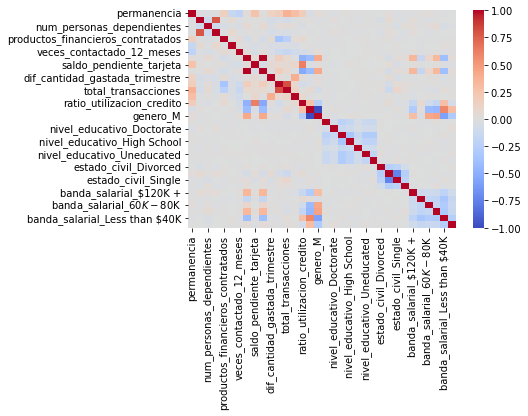

In [6]:
df_permamencia_num=bank_df_clients
df_permamencia_num['permanencia'] = df_permamencia_num['permanencia'].replace({'Existing Customer': 1, 'Attrited Customer': 0})
df_permamencia_num
tabla_correlacion = df_permamencia_num[['permanencia', 'edad', 'num_personas_dependientes', 'num_meses_cliente',
       'productos_financieros_contratados', 'num_meses_inactivo_12_meses',
       'veces_contactado_12_meses', 'limite_credito',
       'saldo_pendiente_tarjeta', 'credito_disponible',
       'dif_cantidad_gastada_trimestre', 'credito_gastado_anual',
       'total_transacciones', 'dif_total_trans_trimestre',
       'ratio_utilizacion_credito', 'genero_F', 'genero_M',
       'nivel_educativo_College', 'nivel_educativo_Doctorate',
       'nivel_educativo_Graduate', 'nivel_educativo_High School',
       'nivel_educativo_Post-Graduate', 'nivel_educativo_Uneducated',
       'nivel_educativo_Unknown', 'estado_civil_Divorced',
       'estado_civil_Married', 'estado_civil_Single', 'estado_civil_Unknown',
       'banda_salarial_$120K +', 'banda_salarial_$40K - $60K',
       'banda_salarial_$60K - $80K', 'banda_salarial_$80K - $120K',
       'banda_salarial_Less than $40K', 'banda_salarial_Unknown']].corr()
sns.heatmap(tabla_correlacion, cmap="coolwarm")
plt.show()


In [7]:
#Cambio a numerico el valor de permanencia
bank_df_clients['permanencia'] = bank_df_clients['permanencia'].replace({'Existing Customer': 1, 'Attrited Customer': 0})

#Calculo ratio de balanceo
valores = bank_df_clients['permanencia'].value_counts()
ratio_balanceo = valores[0] / valores[1]

print('Ratio de balanceo: ',ratio_balanceo)


Ratio de balanceo:  0.19141176470588236


Como hemos visto en la grafica de los valores de la columna de permanencia, solo un 16% representan los clientes que han abandonado el banco por lo que deberemos rebalancear la cantidad de muestras 
con SMOTE

In [8]:
#rebalanceamos la columna de permanencia
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)
bank_df_clients = pd.concat([ pd.DataFrame(y_balanced, columns=['permanencia']), pd.DataFrame(X_balanced)], axis=1)



NameError: name 'X' is not defined

In [ ]:
#Separo  1000 registros para evitar que el modelo entrene con estos datos y que podamos probar la efectividad

# Cojo 500 muestras de clientes que hayan abandonado y 500 de clientes que continuen en el banco
df_permanencia_cexistentes = bank_df_clients[bank_df_clients['permanencia'] == 1]
df_permanencia_cabandonos= bank_df_clients[bank_df_clients['permanencia'] == 0]

muestras_permanencia_cexistentes= df_permanencia_cexistentes.sample(n=2500, random_state=42)
muestras_permanencia_cabandonos = df_permanencia_cabandonos.sample(n=2500, random_state=42)


muestras_prediccion_real = pd.concat([muestras_permanencia_cexistentes, muestras_permanencia_cabandonos])
muestras_pruebas = bank_df_clients.loc[~bank_df_clients.index.isin(muestras_prediccion_real.index)]


muestras_pruebas.to_csv('../data/processed/clientes_banco.csv', index=False)
muestras_prediccion_real.to_csv('../data/processed/datos_para_predecir.csv', index=False)
muestras_prediccion_real

ValueError: a must be greater than 0 unless no samples are taken